In [1]:
import numpy as np
import matplotlib.pyplot as plt

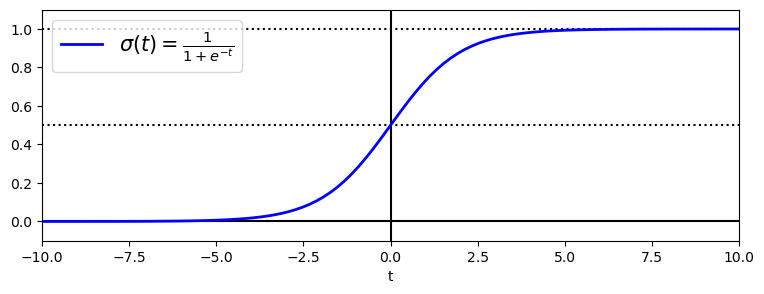

In [161]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=15)
plt.axis([-10, 10, -0.1, 1.1])

plt.savefig('sigmoid', bbox_inches='tight', dpi=600)
plt.show()

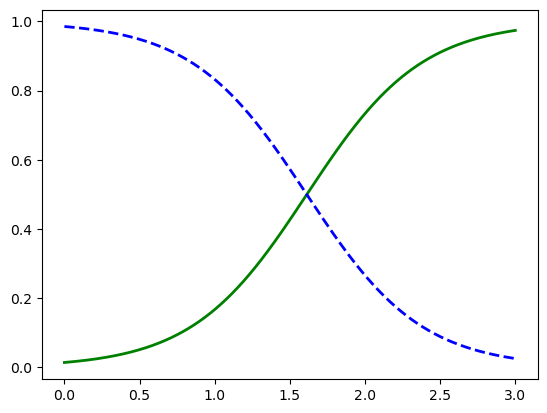

In [52]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")


plt.show()


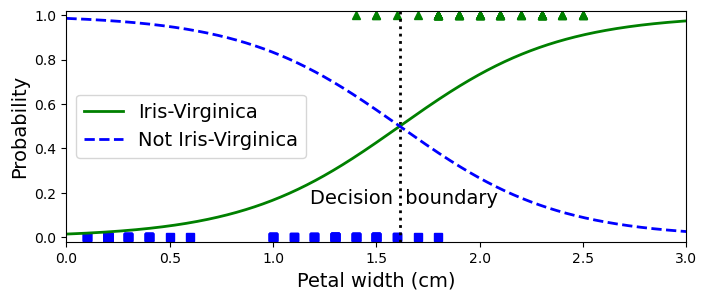

In [58]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

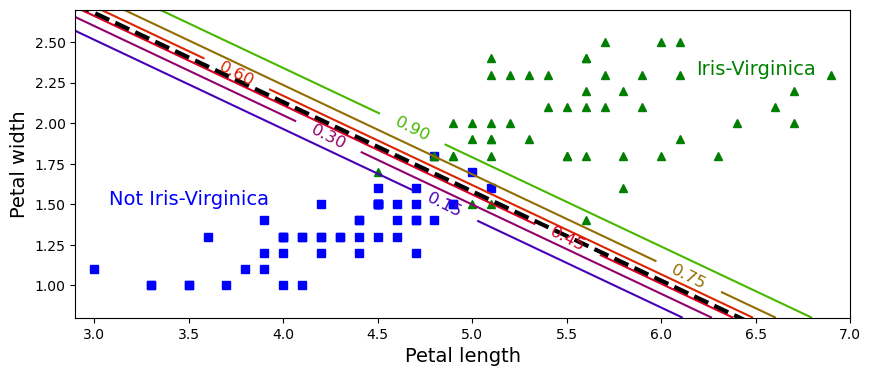

In [62]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.savefig('iris')
plt.show()

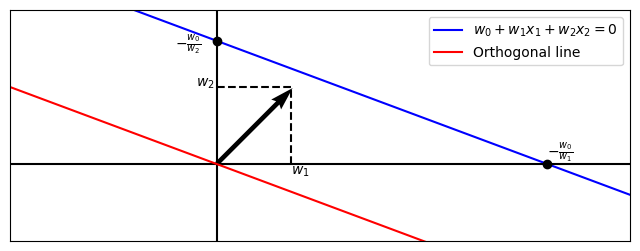

In [160]:
x = np.linspace(-1, 1, num=101)
y = -x + 0.8

plt.figure(figsize=(8, 3))
plt.plot(x, y, color='blue', label='$w_0 + w_1x_1 + w_2x_2 = 0$')
plt.plot(0, 0.8, color='black', marker='o')
plt.plot(0.8, 0, color='black', marker='o')
plt.hlines(0, -1, 1, 'k')
plt.vlines(0, -1, 1, 'k')
plt.axis([-0.5, 1, -0.5, 1])
plt.xticks([])
plt.yticks([])
start = [0, 0]
end = [0.3, 0.3]
plt.quiver(0, 0, 0.3, 0.3, scale=np.sqrt(6))
plt.plot(x, -x, color='red', label='Orthogonal line')
plt.text(-0.1, 0.75, '$-\\frac{w_0}{w_2}$')
plt.text(0.8, 0.05, '$-\\frac{w_0}{w_1}$')
plt.plot(np.linspace(0, 0.18), np.linspace(0.5, 0.5), 'k--')
plt.plot(np.linspace(0.18, 0.18), np.linspace(0, 0.5), 'k--')
plt.text(0.18, -0.07, '$w_1$')
plt.text(-0.05, 0.5, '$w_2$')
plt.legend()
plt.grid()
plt.savefig('decisionboundary')
plt.show()

In [188]:
from sklearn.datasets import make_classification
from scipy.special import softmax
from sklearn.multiclass import OneVsRestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

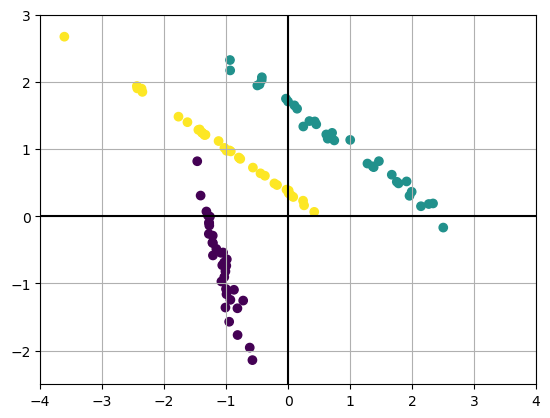

In [195]:
X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=78
)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.hlines(0, -4, 4, colors='black')
plt.vlines(0, -3, 3, colors='black')
plt.axis([-4, 4, -2.5, 3])
plt.grid()
plt.savefig('test')
plt.show()

In [180]:
classes = np.unique(y)
classes

array([0, 1, 2])

In [181]:
# 1 vs all
classificators = []
for c in classes:
    classificators.append(LogisticRegression().fit(X,y==c))

classificators

[LogisticRegression(), LogisticRegression(), LogisticRegression()]

In [182]:
S = []

for clf in classificators:
    S.append(clf.decision_function(X[:5, :]))

S = np.array(S).T
S

array([[-2.28500737, -2.7422761 ,  0.49561196],
       [-2.5583668 , -3.39924673,  1.75971129],
       [ 2.47330416, -6.667942  , -1.17394552],
       [ 2.88527801, -7.01890552, -1.30382861],
       [ 2.04294154, -6.49719312, -0.77897265]])

In [183]:
np.argmax(S, axis=1)

array([2, 2, 0, 0, 0])

In [184]:
# No sklearn

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X, y)
clf.predict(X[:5, :])

array([2, 2, 0, 0, 0])

In [186]:
clf.decision_function(X[5:, :])

array([[ 2.50232314, -6.79434411, -1.0484967 ],
       [-5.83433425,  3.47935071, -2.61858376],
       [-5.59098964,  3.65694037, -3.20480213],
       [ 2.6734376 , -6.79077123, -1.30013838],
       [ 3.81445221, -7.88868876, -1.49323679],
       [-5.44630818,  3.46411798, -3.15832775],
       [-2.34522348, -2.90377267,  0.79627942],
       [ 1.5331424 , -6.04058625, -0.64777429],
       [-5.85195644,  0.86100122,  0.87283041],
       [-5.93999178,  1.34489726,  0.35931495],
       [-5.8074522 ,  2.00385511, -0.70421685],
       [-6.10769851,  2.88092635, -1.43197686],
       [-2.23278009, -2.45179461,  0.03573095],
       [-2.24941617, -2.73419671,  0.43356017],
       [-1.96794896, -1.66079745, -1.3934772 ],
       [-2.71589817, -4.41095392,  3.32625   ],
       [ 3.25002641, -7.32544815, -1.42436829],
       [-5.1293018 ,  3.0653078 , -3.0878401 ],
       [ 4.24129857, -8.19360993, -1.70552802],
       [-2.37492058, -2.41230012,  0.18855468],
       [-2.20555528, -2.26065148, -0.256

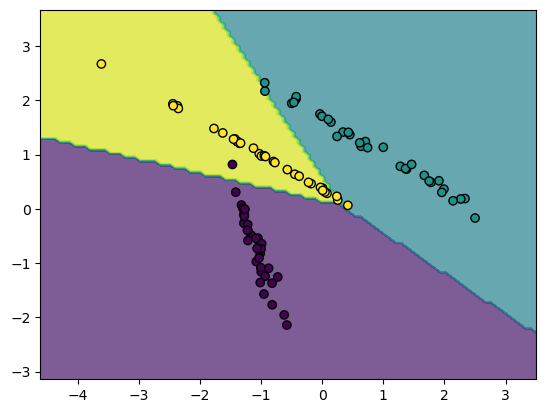

In [196]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method='predict',
    alpha = 0.7,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.savefig('OnevsAll')
plt.show()

In [197]:
clf = LogisticRegression(multi_class="multinomial",penalty=None)
clf.fit(X,y)
clf.predict(X[:5,:])

array([2, 2, 0, 0, 0])

In [198]:
clf.decision_function(X[:5,:])

array([[ -0.77878242, -10.59265017,  11.3714326 ],
       [ -1.49347327, -10.13040244,  11.62387571],
       [ 61.34251331, -65.13069833,   3.78818502],
       [ 66.75679923, -69.88612769,   3.12932847],
       [ 56.32005828, -60.75584383,   4.43578555]])

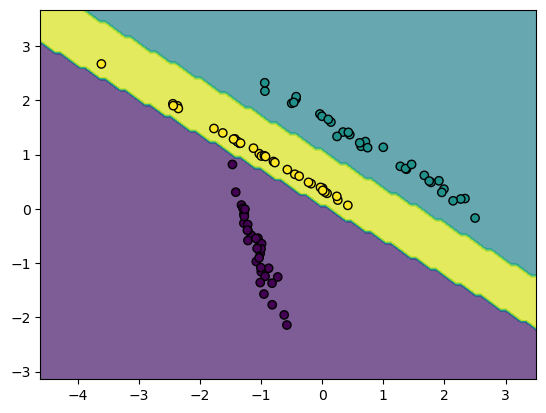

In [200]:
disp = DecisionBoundaryDisplay.from_estimator(
clf, X, response_method="predict",
alpha=0.7,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.savefig('softmax')
plt.show()